In [15]:
import pandas as pd
import matplotlib.pyplot as plt 
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
 

In [2]:
df = pd.read_csv("sentimentdataset.csv")
df.head()


,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [17]:
print(df.columns.tolist())


['Text', 'Sentiment', 'Platform', 'Hashtags', 'Likes', 'Retweets', 'Timestamp', 'Country']


In [18]:
# Drop unnecessary columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], errors='ignore')

# See updated columns
print(df.columns.tolist())


['Text', 'Sentiment', 'Platform', 'Hashtags', 'Likes', 'Retweets', 'Timestamp', 'Country']


In [21]:
from textblob import TextBlob

# Create sentiment column
df['Sentiment'] = df['Text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Convert to Positive, Negative, Neutral
def get_sentiment_label(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment_Label'] = df['Sentiment'].apply(get_sentiment_label)

df[['Text', 'Sentiment', 'Sentiment_Label']].head()


,Text,Sentiment,Sentiment_Label
0,Enjoying a beautiful day at the park! ...,0.750000,Positive
1,Traffic was terrible this morning. ...,-1.000000,Negative
2,Just finished an amazing workout! 💪 ...,0.750000,Positive
3,Excited about the upcoming weekend getaway! ...,0.468750,Positive
4,Trying out a new recipe for dinner tonight. ...,0.136364,Positive


In [20]:
!pip install textblob


                                              0.0/624.3 kB ? eta -:--:--
     -------                                  122.9/624.3 kB ? eta -:--:--
     -----------                            184.3/624.3 kB 2.2 MB/s eta 0:00:01
     ---------------                        256.0/624.3 kB 2.0 MB/s eta 0:00:01
     -------------------                    327.7/624.3 kB 1.8 MB/s eta 0:00:01
     --------------------------             440.3/624.3 kB 2.0 MB/s eta 0:00:01
     ------------------------------         501.8/624.3 kB 1.8 MB/s eta 0:00:01
     --------------------------------       532.5/624.3 kB 1.8 MB/s eta 0:00:01
     -------------------------------------  614.4/624.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  614.4/624.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  614.4/624.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  614.4/624.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------  614.4/62

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


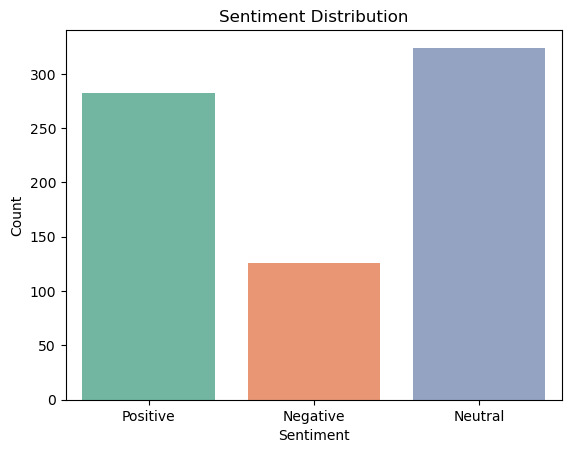

In [23]:
sns.countplot(x='Sentiment_Label', data=df, palette='Set2')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


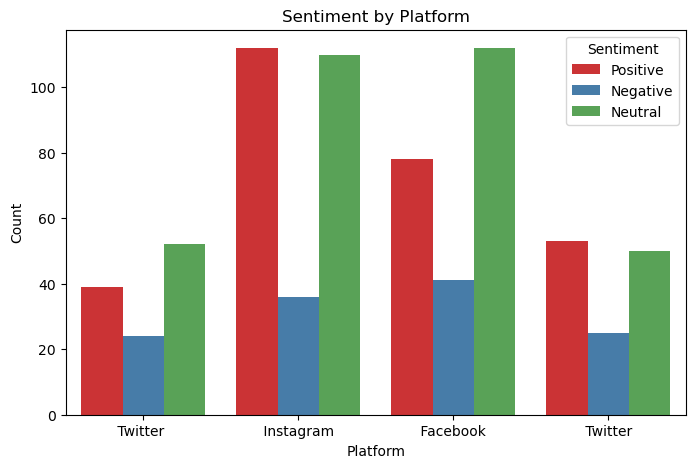

In [24]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Platform', hue='Sentiment_Label', palette='Set1')
plt.title('Sentiment by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()


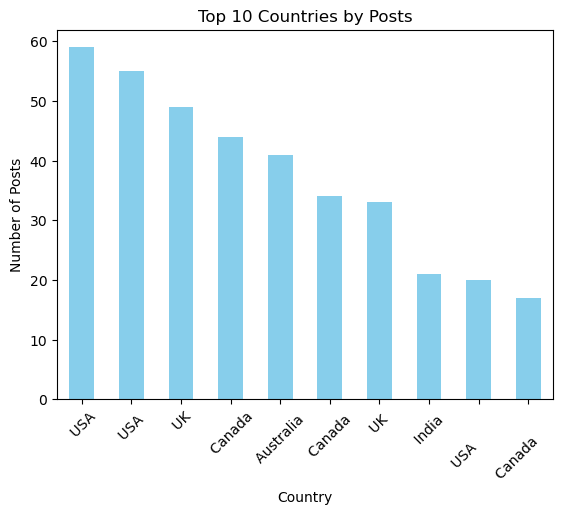

In [25]:
top_countries = df['Country'].value_counts().head(10)
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Posts')
plt.xlabel('Country')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
plt.show()


In [26]:
!pip install wordcloud


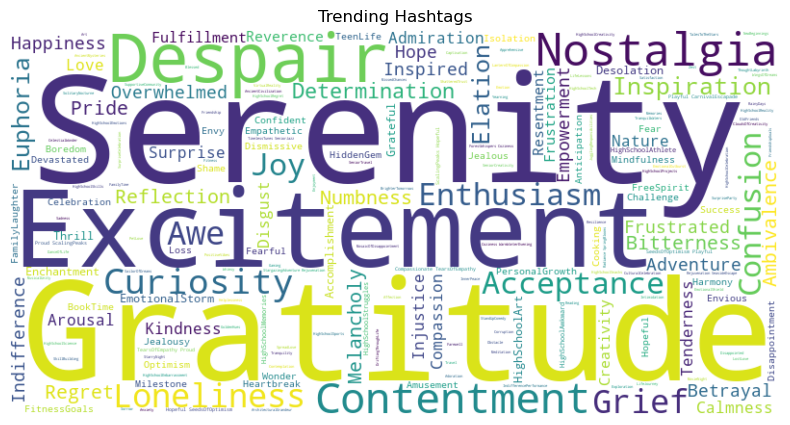

In [27]:
from wordcloud import WordCloud

text = ' '.join(df['Hashtags'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Trending Hashtags')
plt.show()


In [28]:
# Export the DataFrame to Excel
df.to_excel("Sentiment_Analysis_Output.xlsx", index=False)
